# AR

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# To avoid seeing warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('../UPDATE_TSA_NOTEBOOKS/Data/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


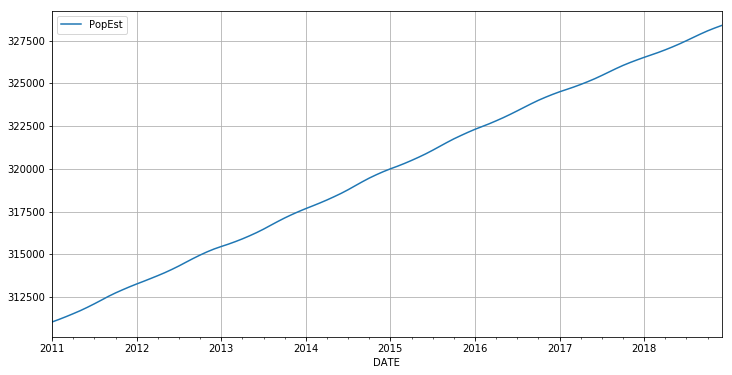

In [13]:
df.plot(figsize=(12,6),grid=True);


1. Choose a model
2. Split Data into Train and Test Sets
3. Fit the Model on Training Set
4. Evaluate Model on Test Set
5. Refit Model on Entire Dataset
6. Forecast for Future Data


### Train Test Split

For this case, we want 12 months for testing data

In [14]:
len(df)

96

In [42]:
train = df.iloc[:84] 
test = df.iloc[84:]
print(train.shape, test.shape)

(84, 1) (12, 1)


### Fit the model

In [43]:
from statsmodels.tsa.ar_model import AR, ARResults

In [44]:
model = AR(train['PopEst'])

In [78]:
# Order 1 p=1 AR(1)
AR1fit = model.fit(maxlag=1,method='cmle',trend='c',solver='lbfgs')

In [79]:
# To know the order
AR1fit.k_ar

1

In [80]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

### Predict

In [81]:
start = len(train_data)
start

84

In [82]:
end=len(train_data) + len(test_data) - 1
end

95

In [83]:
pred1 = AR1fit.predict(start=start,end=end)
pred1 = pred1.rename('AR(1) Predictions')
pred1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [84]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


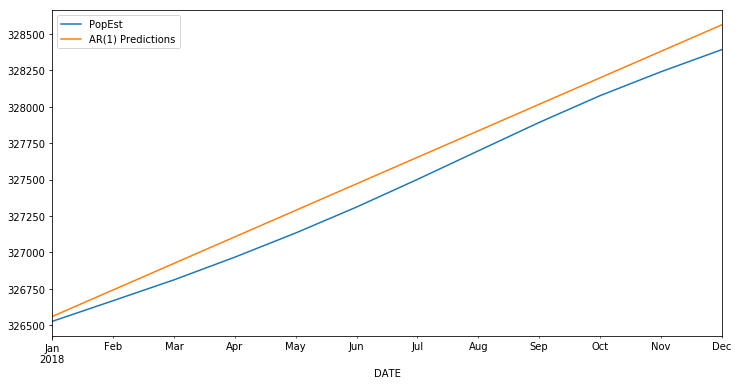

In [85]:
test.plot(figsize=(12,6))
pred1.plot(legend=True);

In [86]:
# Order 2 p=2 AR(2)
AR2fit = model.fit(maxlag=2,method='cmle',trend='c',solver='lbfgs')

In [87]:
# Order
AR2fit.k_ar

2

In [88]:
# Parameters
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [100]:
pred2 = AR2fit.predict(start=start,end=end)
pred2 = pred2.rename('AR(2) Predictions')
pred2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944949
2018-05-01    327177.719499
2018-06-01    327340.045897
2018-07-01    327502.787331
2018-08-01    327665.826848
2018-09-01    327829.064481
2018-10-01    327992.414811
2018-11-01    328155.804861
2018-12-01    328319.172309
Freq: MS, Name: AR(2) Predictions, dtype: float64

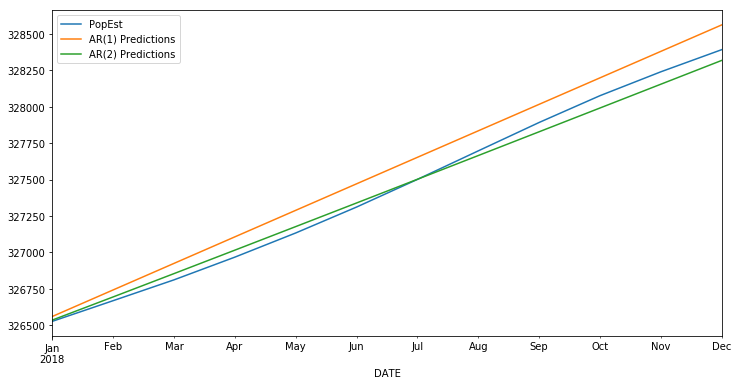

In [116]:
test.plot(figsize=(12,6))
pred1.plot(legend=True)
pred2.plot(legend=True);

### Let Statsmodel choose the order for us

In [93]:
from statsmodels.tsa.ar_model import AR, ARResults
model = AR(train_data['PopEst'])
ARfit = model.fit(ic='t-stat')

In [94]:
ARfit.k_ar # to know the right order

8

In [95]:
ARfit.params # to know all the parameters

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [99]:
pred8 = ARfit.predict(start=start,end=end)
pred8 = pred8.rename('AR(8) Predictions')
pred8

2018-01-01    326523.865558
2018-02-01    326662.772568
2018-03-01    326805.746869
2018-04-01    326960.064200
2018-05-01    327130.572900
2018-06-01    327315.962730
2018-07-01    327511.010030
2018-08-01    327710.938274
2018-09-01    327907.425442
2018-10-01    328092.870661
2018-11-01    328264.133548
2018-12-01    328421.667091
Freq: MS, Name: AR(8) Predictions, dtype: float64

### Evaluate the model

In [97]:
from sklearn.metrics import mean_squared_error

In [101]:
labels = ['AR1','AR2','AR8']
preds = [pred1,pred2,pred8]

for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print('%s: Mean Squared Error = %s'%(labels[i],error))

AR1: Mean Squared Error = 17449.71423587912
AR2: Mean Squared Error = 2713.2585540102214
AR8: Mean Squared Error = 186.97053754548145


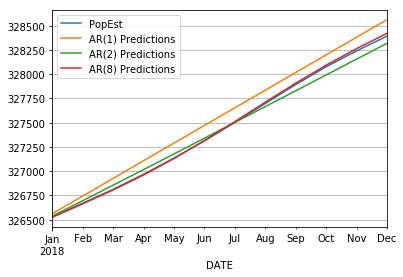

In [130]:
test.plot()
pred1.plot(legend=True)
pred2.plot(legend=True)
pred8.plot(legend=True)
plt.grid(True);
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/AR_img.png');

# Forecast for Future Data

# Refit the model on the entire Dataset

In [111]:
# Forecast for Furture Values
model = AR(df['PopEst']) # Refit on the entire Dataset
ARfit = model.fit() # Refit on the entire Dataset
forecasted_values = ARfit.predict(start=len(df),end=len(df)+12) # Forecasting 1 year = 12 months
forecasted_values = forecasted_values.rename('Forecast')

In [112]:
forecasted_values

2019-01-01    328537.420475
2019-02-01    328673.215529
2019-03-01    328810.443294
2019-04-01    328957.593051
2019-05-01    329117.336070
2019-06-01    329289.277439
2019-07-01    329470.144511
2019-08-01    329655.073911
2019-09-01    329839.483354
2019-10-01    330015.435370
2019-11-01    330175.676450
2019-12-01    330322.580696
2020-01-01    330459.617929
Freq: MS, Name: Forecast, dtype: float64

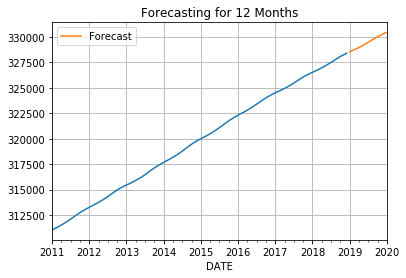

In [132]:
# Plotting
df['PopEst'].plot(title='Forecasting for 12 Months')
forecasted_values.plot(legend=True)
plt.grid(True);
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/AR_Forecast_img.png');